In [1]:
from bayesian_optimization.bo import BayesianOptimization
# from bayesian_optimization.acquisition_functions import AcquisitionFunction
from evaluation.decoder_based_evaluation import CSS_Evaluator
from bayesian_optimization.kernels import GNNKernel, WLSubtreeKernel,GNNEmbedding
from code_construction.code_construction import CodeConstructor
from bayesian_optimization.encoder import CSSEncoder
from bayesian_optimization.bo import LogicalErrorRatePerQubit
import torch
from bayesian_optimization.gp import GaussianProcess_QEC
import matplotlib.pyplot as plt
import torch.nn as nn
from grakel.kernels import WeisfeilerLehman, VertexHistogram,RandomWalkLabeled
from gpytorch.kernels import ScaleKernel, RBFKernel
import numpy as np
from code_construction.code_construction import CSSCode
DEVICE='cuda'

/home/cyyh/miniconda3/envs/QEC2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np

def generate_rotated_surface_code_check_matrix(p):
    """
    p*p rotated surface code
    """
    def index(row, col,reversed=False):
        if row<0 or row>=p or col<0 or col>=p:
            return -1
        if reversed:
            return row + col * p
        return row * p + col
    if p % 2 == 0:
        raise ValueError("p must be an odd number.")
    N = int(p * p)
    stabilizers_num = int((p-1)*(p-1)/2+p-1)
    Hx = np.zeros((stabilizers_num, N), dtype=int)
    Hz = np.zeros((stabilizers_num, N), dtype=int)
    

    x_stabilizers = [[] for i in range(stabilizers_num)]
    z_stabilizers = [[] for i in range(stabilizers_num)]
    for i in range(p+1):
        for j in range((p-1)//2):
            if index(i-1,j+(i+1)%2)!= -1:
                x_stabilizers[i*(p-1)//2+j].append(index(i-1,2*j+(i+1)%2))
            if index(i-1,j+(i+1)%2+1)!= -1:
                x_stabilizers[i*(p-1)//2+j].append(index(i-1,2*j+(i+1)%2+1))
            if index(i,j+(i+1)%2)!= -1:
                x_stabilizers[i*(p-1)//2+j].append(index(i,2*j+(i+1)%2))
            if index(i,j+(i+1)%2+1)!= -1:
                x_stabilizers[i*(p-1)//2+j].append(index(i,2*j+(i+1)%2+1))
    for i in range(p+1):
        for j in range((p-1)//2):
            if index(i-1,j+(i)%2,reversed=True)!= -1:
                z_stabilizers[i*(p-1)//2+j].append(index(i-1,2*j+(i)%2,reversed=True))
            if index(i-1,j+(i)%2+1,reversed=True)!= -1:
                z_stabilizers[i*(p-1)//2+j].append(index(i-1,2*j+(i)%2+1,reversed=True))
            if index(i,j+(i)%2,reversed=True)!= -1:
                z_stabilizers[i*(p-1)//2+j].append(index(i,2*j+(i)%2,reversed=True))
            if index(i,j+(i)%2+1,reversed=True)!= -1:
                z_stabilizers[i*(p-1)//2+j].append(index(i,2*j+(i)%2+1,reversed=True))

    for i in range(stabilizers_num):
        for j in x_stabilizers[i]:
            Hx[i,j] = 1
        for j in z_stabilizers[i]:
            Hz[i,j] = 1
            
    return Hx, Hz

# hx,hz = generate_rotated_surface_code_check_matrix(9)
# surface11 = CSSCode(hx,hz)
# print(surface11.n)
# evaluator =  CSS_Evaluator(surface11.hx,surface11.hz)
# pl= evaluator.Get_precise_logical_error_rate(physical_error_rate=0.0001,trail = 3000,block=999)
# print(pl)

In [2]:
from bayesian_optimization.bo import LogicalErrorRatePerQubit
c_gnn_333 = np.array([0,3,0,0,1,0,2,3,1])
c_wl_333 = np.array([2,3 ,0 ,0 ,0 ,1 ,0 ,0 ,3])
codeconstructor = CodeConstructor('qc-ldpc-hgp',{'p':3,'q':3,'m':3})
LERPQ = LogicalErrorRatePerQubit(codeconstructor)
print(LERPQ.distance(c_gnn_333))
print(LERPQ.distance(c_wl_333))


/home/cyyh/miniconda3/envs/QEC2/lib/python3.10/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bposd_decoder.py:45: UserWarning: This is the old syntax for the `bposd_decoder` from `ldpc v1`. Use the `BpOsdDecoder` class from `ldpc v2` for additional features.
  warnings.warn(


11.535013497260397
12.646311232878848


code rates
[0.1111111111111111, 0.1111111111111111, 0.02040816326530612, 0.012345679012345678, 0.008264462809917356, 0.005917159763313609]


/home/cyyh/miniconda3/envs/QEC2/lib/python3.10/site-packages/ldpc/_legacy_ldpc_v1/_legacy_bposd_decoder.py:45: UserWarning: This is the old syntax for the `bposd_decoder` from `ldpc v1`. Use the `BpOsdDecoder` class from `ldpc v2` for additional features.
  warnings.warn(


n_e: 1
n_e: 2
n_e: 3
n_e: 4
n_e: 5
n_e: 6
n_e: 7
n_e: 8
n_e: 9
n_e: 10
n_e: 11
n_e: 12
n_e: 13
n_e: 14
n_e: 15
n_e: 16
n_e: 17
n_e: 18
n_e: 19
n_e: 20
n_e: 21
n_e: 22
n_e: 23
n_e: 24
n_e: 25
n_e: 26
n_e: 27
n_e: 28
n_e: 29
n_e: 30
n_e: 31
n_e: 32
n_e: 33
n_e: 34
n_e: 35
n_e: 36
n_e: 37
n_e: 38
n_e: 39
n_e: 40
n_e: 41
n_e: 42
n_e: 43
n_e: 44
n_e: 45
n_e: 46
n_e: 47
n_e: 48
n_e: 49
n_e: 50
n_e: 51
n_e: 52
n_e: 53
n_e: 54
n_e: 55
n_e: 56
n_e: 57
n_e: 58
n_e: 59
n_e: 60
n_e: 61
n_e: 62
n_e: 63
n_e: 64
n_e: 65
n_e: 66
n_e: 67
n_e: 68
n_e: 69
n_e: 70
n_e: 71
n_e: 72
n_e: 73
n_e: 74
n_e: 75
n_e: 76
n_e: 77
n_e: 78
n_e: 79
n_e: 80
n_e: 81
n_e: 82
n_e: 83
n_e: 84
n_e: 85
n_e: 86
n_e: 87
n_e: 88
n_e: 89
n_e: 90
n_e: 91
n_e: 92
n_e: 93
n_e: 94
n_e: 95
n_e: 96
n_e: 97
n_e: 98
n_e: 99
n_e: 100
n_e: 101
n_e: 102
n_e: 103
n_e: 104
n_e: 105
n_e: 106
n_e: 107
n_e: 108
n_e: 109
n_e: 110
n_e: 111
n_e: 112
n_e: 113
n_e: 114
n_e: 115
n_e: 116
n_e: 117
n_e: 118
n_e: 119
n_e: 120
n_e: 121
n_e: 122
n_e: 123
n

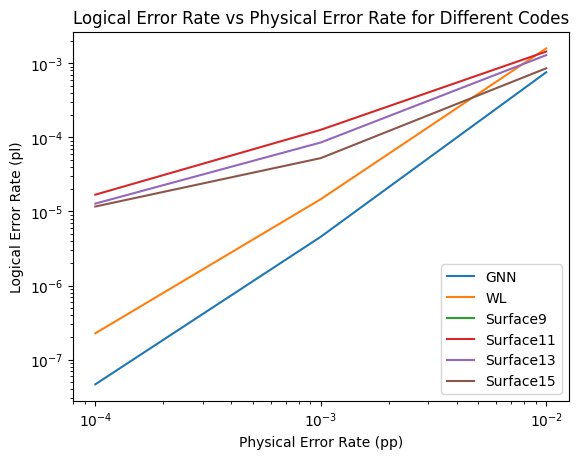

In [4]:
c_gnn_333 = np.array([0,3,0,0,1,0,2,3,1])
c_wl_333 = np.array([2,3 ,0 ,0 ,0 ,1 ,0 ,0 ,3])
codeconstructor = CodeConstructor('qc-ldpc-hgp',{'p':3,'q':3,'m':3})
css_gnn_333 = codeconstructor.construct(c_gnn_333) 
css_wl_333 = codeconstructor.construct(c_wl_333)

codes = [(css_gnn_333.hx,css_gnn_333.hz),(css_wl_333.hx,css_wl_333.hz)]
for i in range(4):
    codes.append(generate_rotated_surface_code_check_matrix(i*2+1))

code_rates = [18/162,18/162]
for i in range(3,7):
    code_rates.append(1/((i*2+1)**2))
print('code rates')
print(code_rates)
pl_list = []
for i in codes:
    evaluator =  CSS_Evaluator(i[0],i[1])
    PL= []
    for pp in [0.01,0.001,0.0001]:
        pl,_ = evaluator.Get_precise_logical_error_rate(physical_error_rate=pp,trail = 3000,block=999)
        if i==0 or i==1:
            pl_per_lq = 1-(1-pl)**(1/18)
        else:
            pl_per_lq = pl
        print(pl)
        print(pl_per_lq)
        PL.append(pl_per_lq)
    pl_list.append(PL)
pp_values = [0.01, 0.001, 0.0001]
labels = ['GNN', 'WL', 'Surface7', 'Surface9', 'Surface11', 'Surface13']

for i in range(len(pl_list)):
    plt.plot(pp_values, pl_list[i], label=labels[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Physical Error Rate (pp)')
plt.ylabel('Logical Error Rate (pl)')
plt.legend()
plt.title('Logical Error Rate vs Physical Error Rate for Different Codes')
plt.show()

    


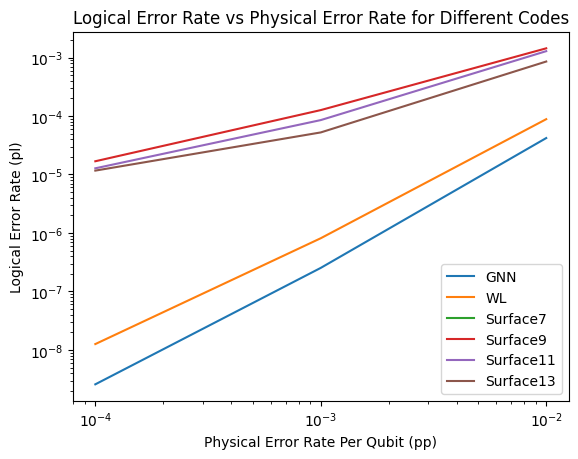

In [5]:
for i in range(len(pl_list[0])):
    pl_list[0][i] = 1-(1-pl_list[0][i])**(1/18)
    pl_list[1][i] = 1-(1-pl_list[1][i])**(1/18)
pp_values = [0.01, 0.001, 0.0001]
labels = ['GNN', 'WL', 'Surface7', 'Surface9', 'Surface11', 'Surface13']

for i in range(len(pl_list)):
    plt.plot(pp_values, pl_list[i], label=labels[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Physical Error Rate Per Qubit (pp)')
plt.ylabel('Logical Error Rate (pl)')
plt.legend()
plt.title('Logical Error Rate vs Physical Error Rate for Different Codes')
plt.show()

In [9]:
hx,hz = generate_rotated_surface_code_check_matrix(7)
surface11 = CSSCode(hx,hz)
print(surface11.n)
evaluator =  CSS_Evaluator(surface11.hx,surface11.hz)
pl= evaluator.Get_precise_logical_error_rate(physical_error_rate=0.0001,trail = 10000,block=999)
print(pl)

49
n_e: 1
n_e: 2
n_e: 3
n_e: 4
n_e: 5
n_e: 6
n_e: 7
n_e: 8
n_e: 9
n_e: 10
n_e: 11
n_e: 12
n_e: 13
n_e: 14
n_e: 15
n_e: 16
n_e: 17
n_e: 18
n_e: 19
n_e: 20
n_e: 21
n_e: 22
n_e: 23
n_e: 24
n_e: 25
n_e: 26
n_e: 27
n_e: 28
n_e: 29
n_e: 30
n_e: 31
n_e: 32
n_e: 33
n_e: 34
n_e: 35
n_e: 36
n_e: 37
n_e: 38
n_e: 39
n_e: 40
n_e: 41
n_e: 42
n_e: 43
n_e: 44
n_e: 45
n_e: 46
n_e: 47
n_e: 48
(1.0985175391826943e-05, [0, 0.0022448979591836735, 0.0032278217409412746, 0.003825310806503028, 0.007698145939499078, 0.010731275583582254, 0.019756152630390607, 0.02603386706600622, 0.035617726578112144, 0.05097756986925753, 0.06572827417380661, 0.0799300611964531, 0.08971581496113164, 0.0976592977893368, 0.10960721868365181, 0.12918077183480028, 0.13251347243332873, 0.14916114479063866, 0.15220831535030932, 0.15971814445096888, 0.17106051527860994, 0.1786915316416998, 0.17969115582592418, 0.20022282349196244, 0.19002761084943967, 0.20599933708982432, 0.20429561982073396, 0.21225194132873165, 0.21253741855960556,

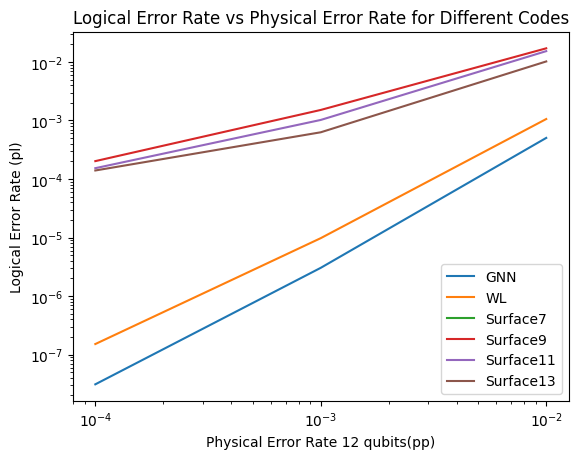

In [6]:
for i in range(len(pl_list[0])):
    for j in range (len(pl_list)):
        pl_list[j][i] = 1-(1-pl_list[j][i])**(12)

pp_values = [0.01, 0.001, 0.0001]
labels = ['GNN', 'WL', 'Surface7', 'Surface9', 'Surface11', 'Surface13']

for i in range(len(pl_list)):
    plt.plot(pp_values, pl_list[i], label=labels[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Physical Error Rate 12 qubits(pp)')
plt.ylabel('Logical Error Rate (pl)')
plt.legend()
plt.title('Logical Error Rate vs Physical Error Rate for Different Codes')
plt.show()